In [199]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
warnings.filterwarnings('ignore')

In [200]:
df = pd.read_csv('dataset.csv')

In [201]:
df.head()

,treatment company,azimuth,md (ft),tvd (ft),date on production,operator,footage lateral length,well spacing,porpoise deviation,porpoise count,...,p-velocity,s-velocity,youngs modulus,isip,breakdown pressure,pump rate,total number of stages,proppant volume,proppant fluid ratio,production
0,treatment company 1,-32.279999,19148,6443.0,3/1/2018,operator 1,11966.0,4368.46290,6.33,12,...,13592.23,6950.44,30.82,4149.0,NaN,83,56,21568792.0,1.23,5614.947951
1,treatment company 2,-19.799999,15150,7602.0,7/1/2014,operator 2,6890.0,4714.99220,1.28,4,...,11735.04,7162.45,29.72,5776.0,NaN,102,33,9841307.0,1.47,2188.836707
2,treatment company 3,-26.879999,14950,5907.0,8/1/2018,operator 1,8793.0,798.92096,2.03,6,...,13227.81,6976.93,30.99,4628.0,NaN,88,62,17116240.0,1.67,1450.033022
3,treatment company 4,-49.099998,11098,6538.0,1/1/2012,operator 1,4234.0,NaN,6.00,23,...,12646.34,6799.37,26.20,4582.0,NaN,100,11,3749559.0,0.77,1060.764407
4,treatment company 5,5.560000,10549,7024.0,1/1/2012,operator 3,2972.0,2967.56300,11.87,9,...,13192.18,7046.91,31.18,4909.0,NaN,94,9,6690705.0,1.32,607.530385


In [202]:
df.shape

(1000, 28)

In [203]:
df.columns

Index(['treatment company', 'azimuth', 'md (ft)', 'tvd (ft)',
       'date on production', 'operator', 'footage lateral length',
       'well spacing', 'porpoise deviation', 'porpoise count', 'shale footage',
       'acoustic impedance', 'log permeability', 'porosity', 'poisson ratio',
       'water saturation', 'toc', 'vcl', 'p-velocity', 's-velocity',
       'youngs modulus', 'isip', 'breakdown pressure', 'pump rate',
       'total number of stages', 'proppant volume', 'proppant fluid ratio',
       'production'],
      dtype='object')

In [204]:
# data type check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   treatment company       1000 non-null   object 
 1   azimuth                 945 non-null    float64
 2   md (ft)                 1000 non-null   int64  
 3   tvd (ft)                980 non-null    float64
 4   date on production      1000 non-null   object 
 5   operator                1000 non-null   object 
 6   footage lateral length  1000 non-null   float64
 7   well spacing            844 non-null    float64
 8   porpoise deviation      1000 non-null   float64
 9   porpoise count          1000 non-null   int64  
 10  shale footage           1000 non-null   int64  
 11  acoustic impedance      1000 non-null   float64
 12  log permeability        1000 non-null   float64
 13  porosity                881 non-null    float64
 14  poisson ratio           1000 non-null   f

The dataset contains 3 different data types: float64, int64 and object

In [205]:
# missing value check
df.isna().sum()

treatment company           0
azimuth                    55
md (ft)                     0
tvd (ft)                   20
date on production          0
operator                    0
footage lateral length      0
well spacing              156
porpoise deviation          0
porpoise count              0
shale footage               0
acoustic impedance          0
log permeability            0
porosity                  119
poisson ratio               0
water saturation          577
toc                        21
vcl                         0
p-velocity                  0
s-velocity                  0
youngs modulus             19
isip                       77
breakdown pressure        744
pump rate                   0
total number of stages      0
proppant volume           132
proppant fluid ratio        0
production                  0
dtype: int64

There are some missing values in the dataset and needs to be treated

In [206]:
# check duplicates
duplicates =df.duplicated()
duplicates.sum()

0

No duplicate in the dataset

In [207]:
# describe the dataset
df.describe()

,azimuth,md (ft),tvd (ft),footage lateral length,well spacing,porpoise deviation,porpoise count,shale footage,acoustic impedance,log permeability,...,p-velocity,s-velocity,youngs modulus,isip,breakdown pressure,pump rate,total number of stages,proppant volume,proppant fluid ratio,production
count,945.000000,1000.000000,980.000000,1000.000000,844.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,981.000000,923.000000,256.000000,1000.000000,1000.000000,8.680000e+02,1000.00000,1000.000000
mean,-33.905735,13988.387000,7103.620408,6387.049510,2223.227174,50.457090,9.443000,3784.827000,33492.835400,0.623570,...,12766.714230,6933.582230,30.275525,4965.485374,7365.949219,85.052000,28.815000,1.060880e+07,1.16613,1949.919511
std,17.975658,2584.315924,896.947293,2520.330314,1255.063341,118.436695,6.882596,3703.775191,2074.387344,0.392759,...,713.112641,179.966553,1.488059,778.399766,1484.094160,12.510308,15.518234,6.404058e+06,0.37555,1351.485865
min,-87.250000,8642.000000,4859.000000,1329.000000,335.458620,0.030000,0.000000,0.000000,26740.050000,-0.030000,...,10631.340000,6374.620000,25.640000,2149.000000,4364.000000,2.000000,9.000000,1.760960e+05,0.03000,76.107246
25%,-46.220001,12157.500000,6407.000000,4668.000000,1084.525475,4.660000,4.000000,0.000000,32718.460000,0.310000,...,12230.625000,6808.660000,29.720000,4391.500000,6102.750000,77.000000,16.000000,6.146848e+06,0.95000,1003.897453
50%,-32.990002,13659.500000,6977.000000,5927.000000,1999.295250,10.880000,8.000000,3591.500000,34592.225000,0.520000,...,13158.920000,6958.975000,30.840000,4927.000000,7018.000000,86.000000,26.000000,9.082286e+06,1.12000,1568.681918
75%,-22.580000,15468.000000,7820.000000,7744.000000,3090.201450,30.537500,13.000000,6081.750000,34819.790000,0.870000,...,13272.570000,7037.292500,31.130000,5550.500000,8868.250000,95.000000,39.000000,1.366105e+07,1.33000,2621.207163
max,22.940001,27797.000000,9639.000000,19849.000000,5225.089400,1106.130000,39.000000,17763.000000,38057.630000,1.940000,...,14501.580000,7491.530000,33.100000,9295.000000,11116.000000,110.000000,110.000000,4.195037e+07,5.41000,8880.671151


The table above is the statistical description to the data

### EDA

Text(0, 0.5, 'Number of missing values')

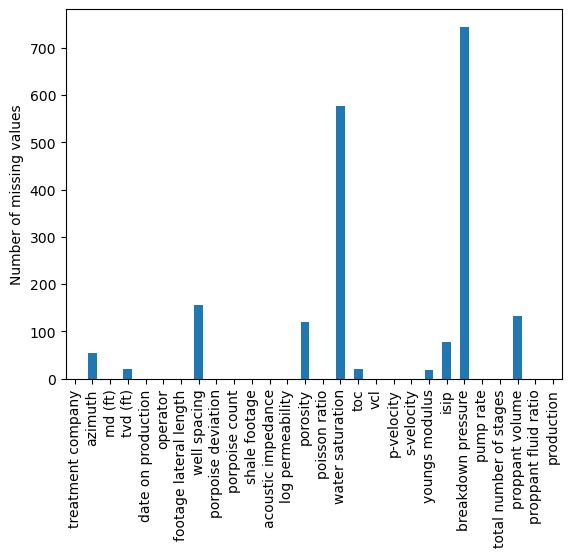

In [208]:
## visualize the missing values
df.isna().sum().plot(kind='bar')
plt.ylabel("Number of missing values")

* The bar plot above shows number of missing values in each feature.
* Water saturation and breakdown pressure columns have a lot of missing values and they need to be dropped

In [209]:
# change the data type of 'date of production'
df['date on production'] = pd.to_datetime(df['date on production'])

Text(0.5, 1.0, 'Production of oil by date')

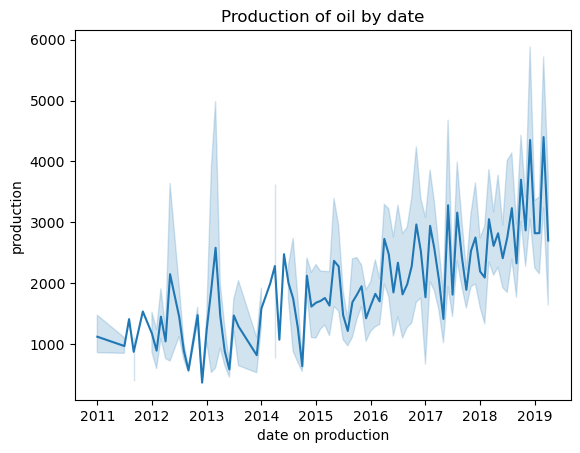

In [210]:
# plot Production against date on production
sns.lineplot(x=df['date on production'],y=df['production'])
plt.title("Production of oil by date")

There is an increase in production of oil from 2011 t0 2019

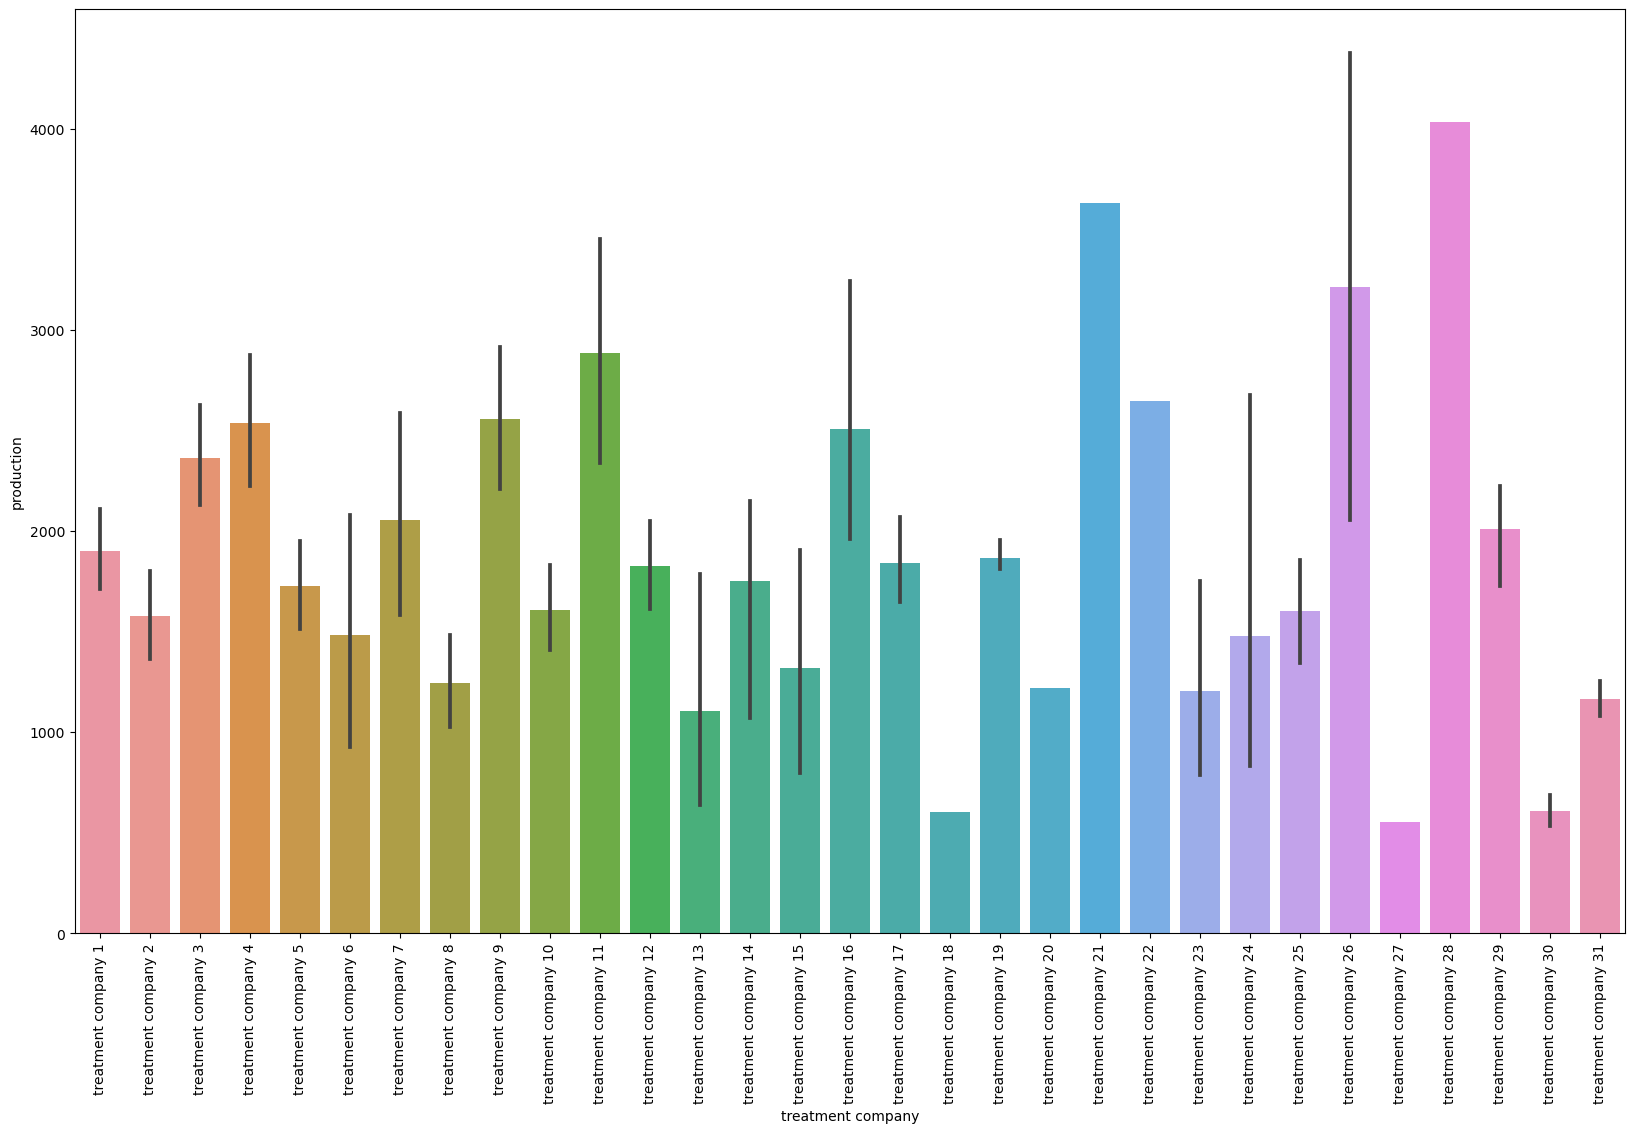

In [211]:
# plot treatment company against production
plt.figure(figsize=(20,12))
sns.barplot(x=df['treatment company'], y=df['production'])
plt.xticks(rotation=90)
plt.show()

The above plot is the production distribution by treatment companies

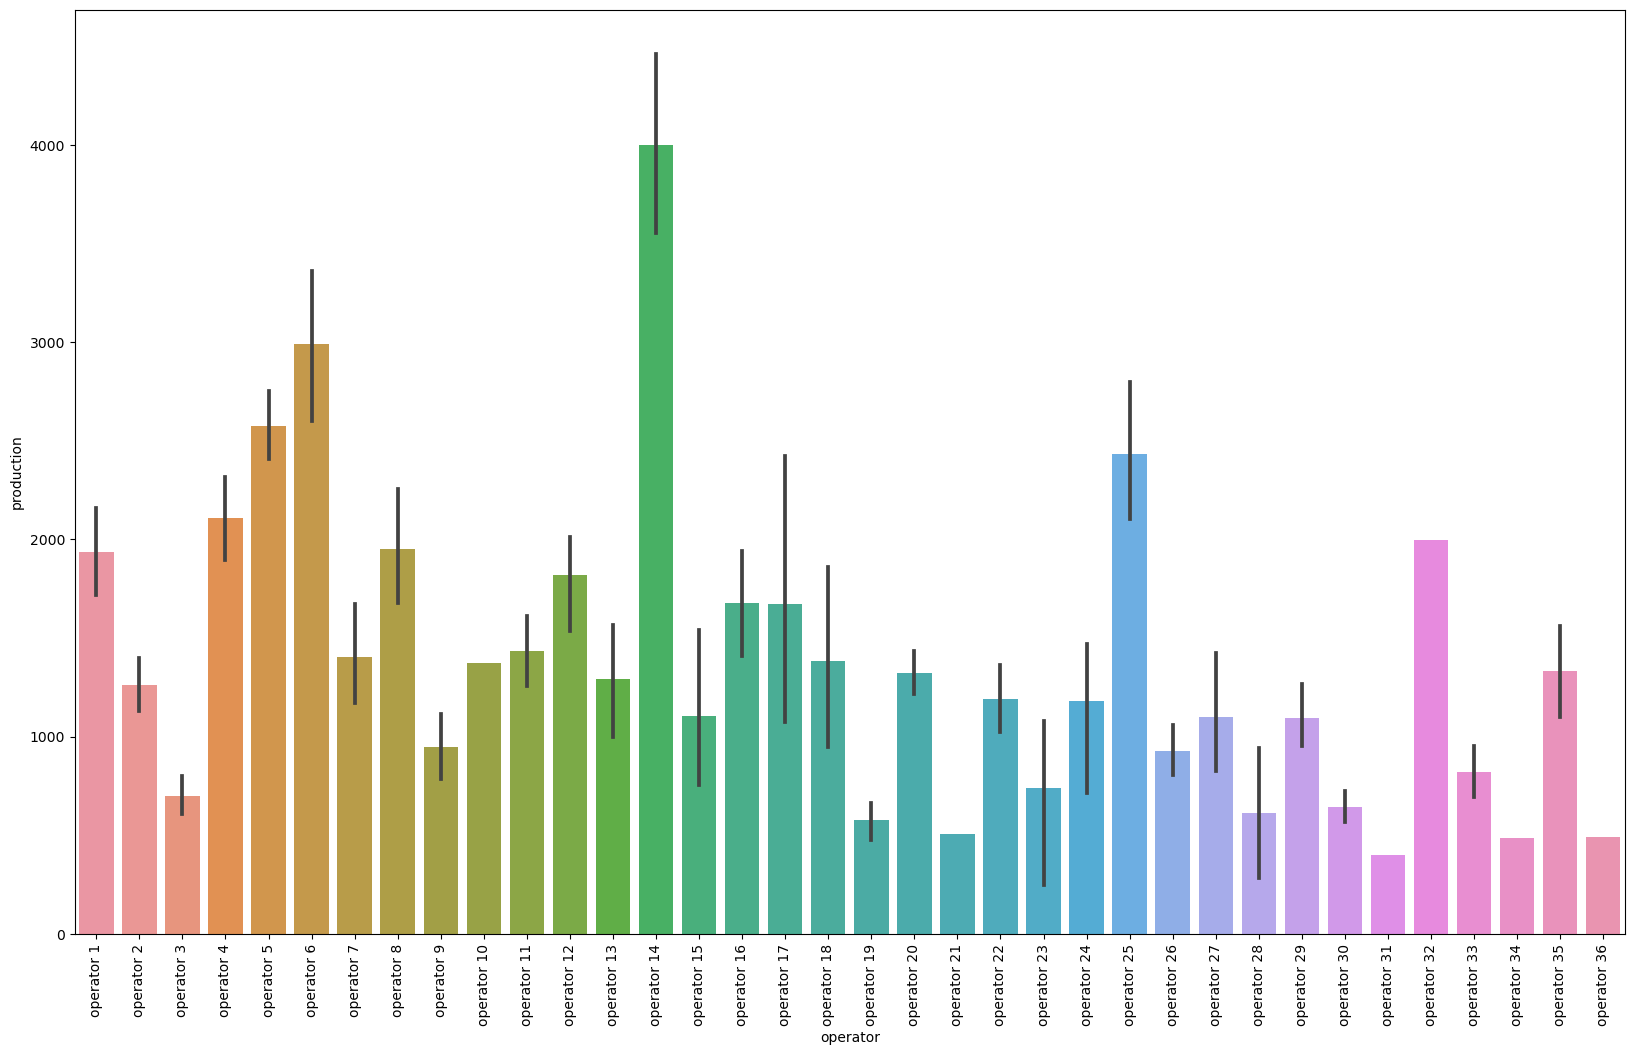

In [212]:
# plot operators against production
plt.figure(figsize=(20,12))
sns.barplot(x=df['operator'], y=df['production'])
plt.xticks(rotation=90)
plt.show()

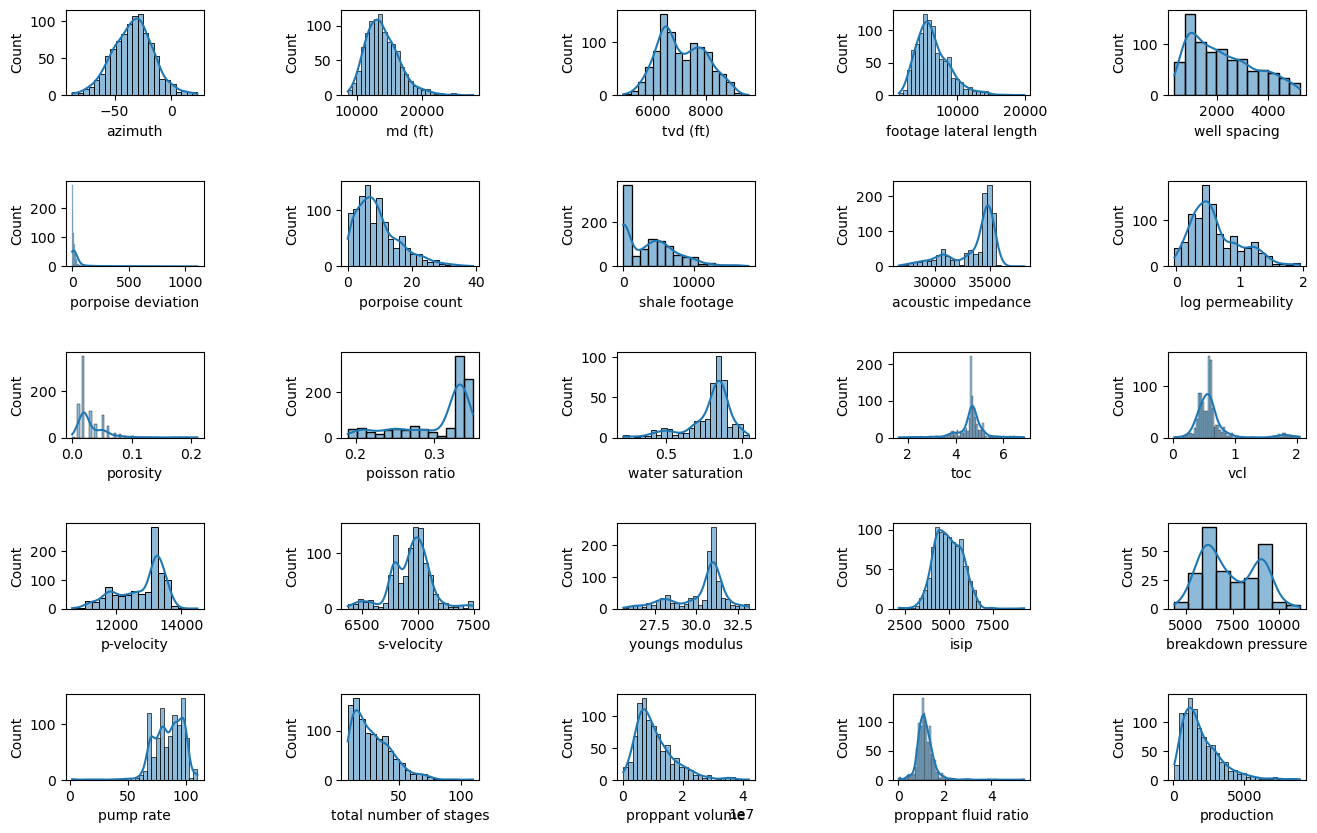

In [213]:
# Histogram of the columns in the dataset 
num_col = df.select_dtypes(exclude=["object","datetime"]).columns
fig,ax =plt.subplots(5,5, figsize=(16,10))

for idx, num_col in enumerate(num_col):
    row, col = idx //5, idx %5 
    sns.histplot(x=num_col, data=df,kde=True, ax=ax[row,col])
    plt.interactive(True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

* Distribution of the columns with missing values
  - Azimuth -- normally distributed
  - toc     -- left skewed
  - proppant volume --skewed to right
  - tvd(ft) -- normal
  - porosity -- right skewed
  - isip    -- right skewed
  - young modulus - left skewed
  - well spacing -- right skewed

The above plots is the histogram of each numerical column in the dataset. And it is showing the distribution of each numerical feature. Some are normally distributed, skewed to left and right.

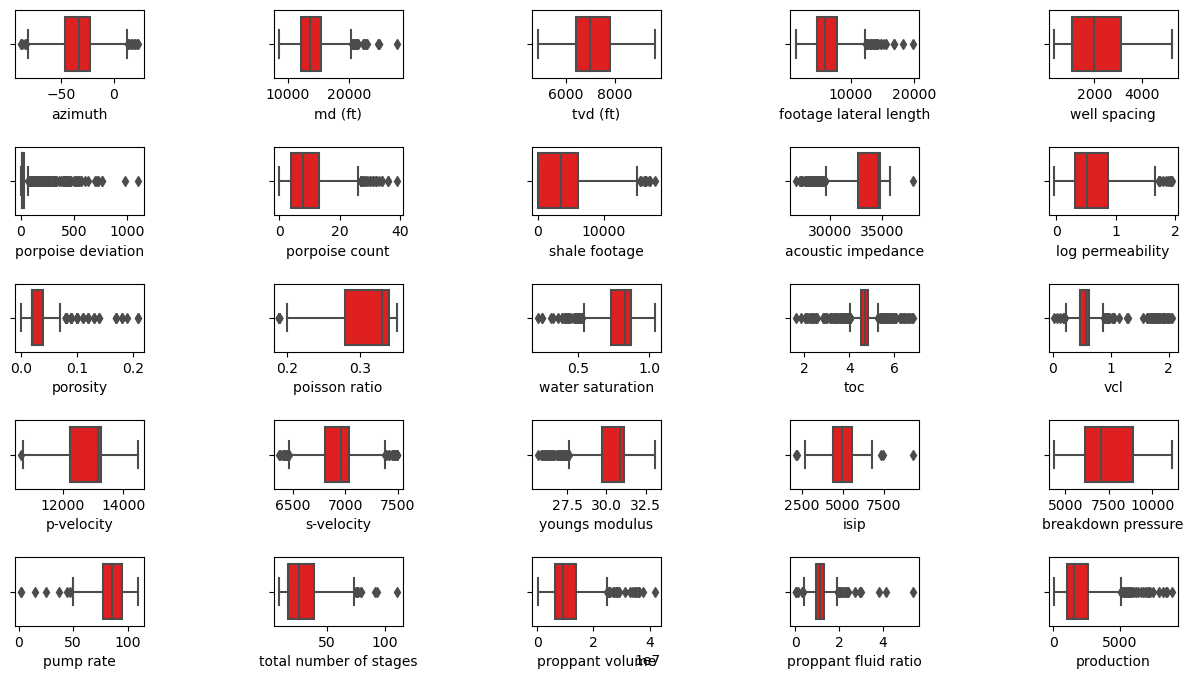

In [214]:
# Box of the columns in the dataset 
num_col = df.select_dtypes(exclude=["object","datetime"]).columns
fig,ax =plt.subplots(5,5, figsize=(15,8))

for idx, num_col in enumerate(num_col):
    row, col = idx //5, idx %5 
    sns.boxplot(x=num_col, data=df,color='red', ax=ax[row,col])
    plt.interactive(True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

Most of the columns in the dataset contains outliers from the above plots.

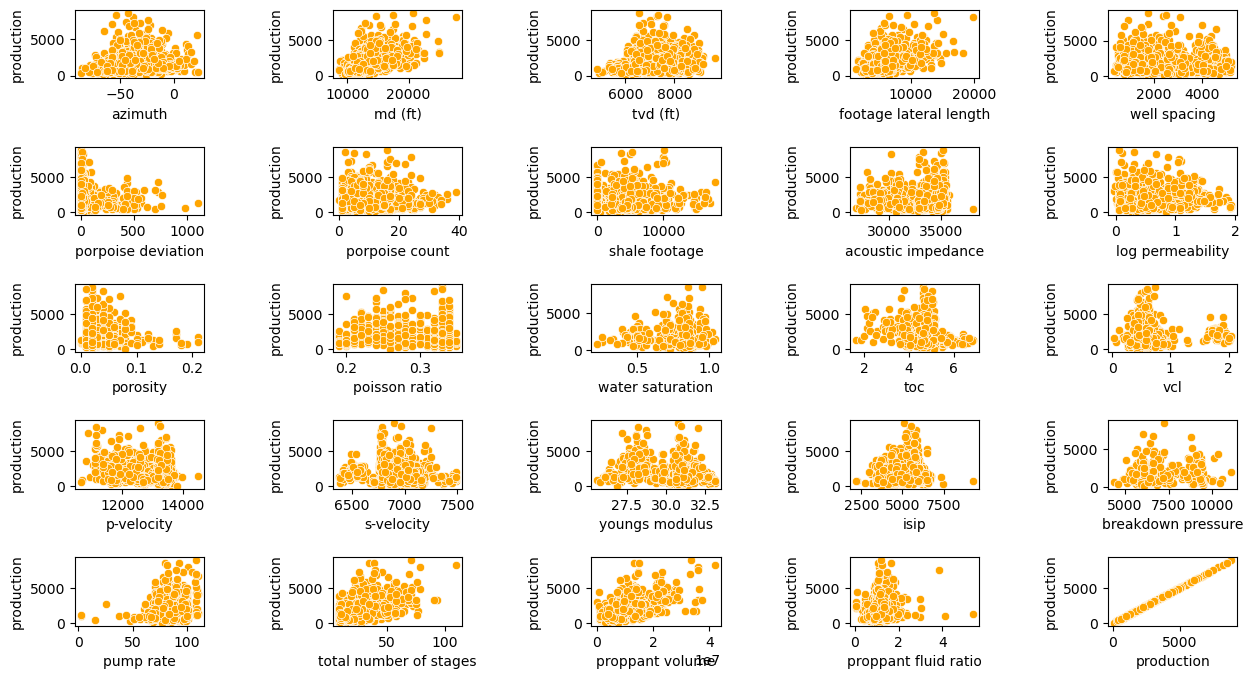

In [215]:
# plot Production against each column
# Histogram of the columns in the dataset 
num_col = df.select_dtypes(exclude=["object","datetime"]).columns
fig,ax =plt.subplots(5,5, figsize=(15,8))

for idx, num_col in enumerate(num_col):
    row, col = idx //5, idx %5 
    sns.scatterplot(x=num_col, data=df,y=df['production'],color='orange' ,ax=ax[row,col])
    plt.interactive(True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

* Insight from the above plots: 
- The following columns have little or no relationship the target, production column:
  - well spacing
  - poisson ratio
  - p-velocity
  - toc
  - s-velocity
 

<Axes: >

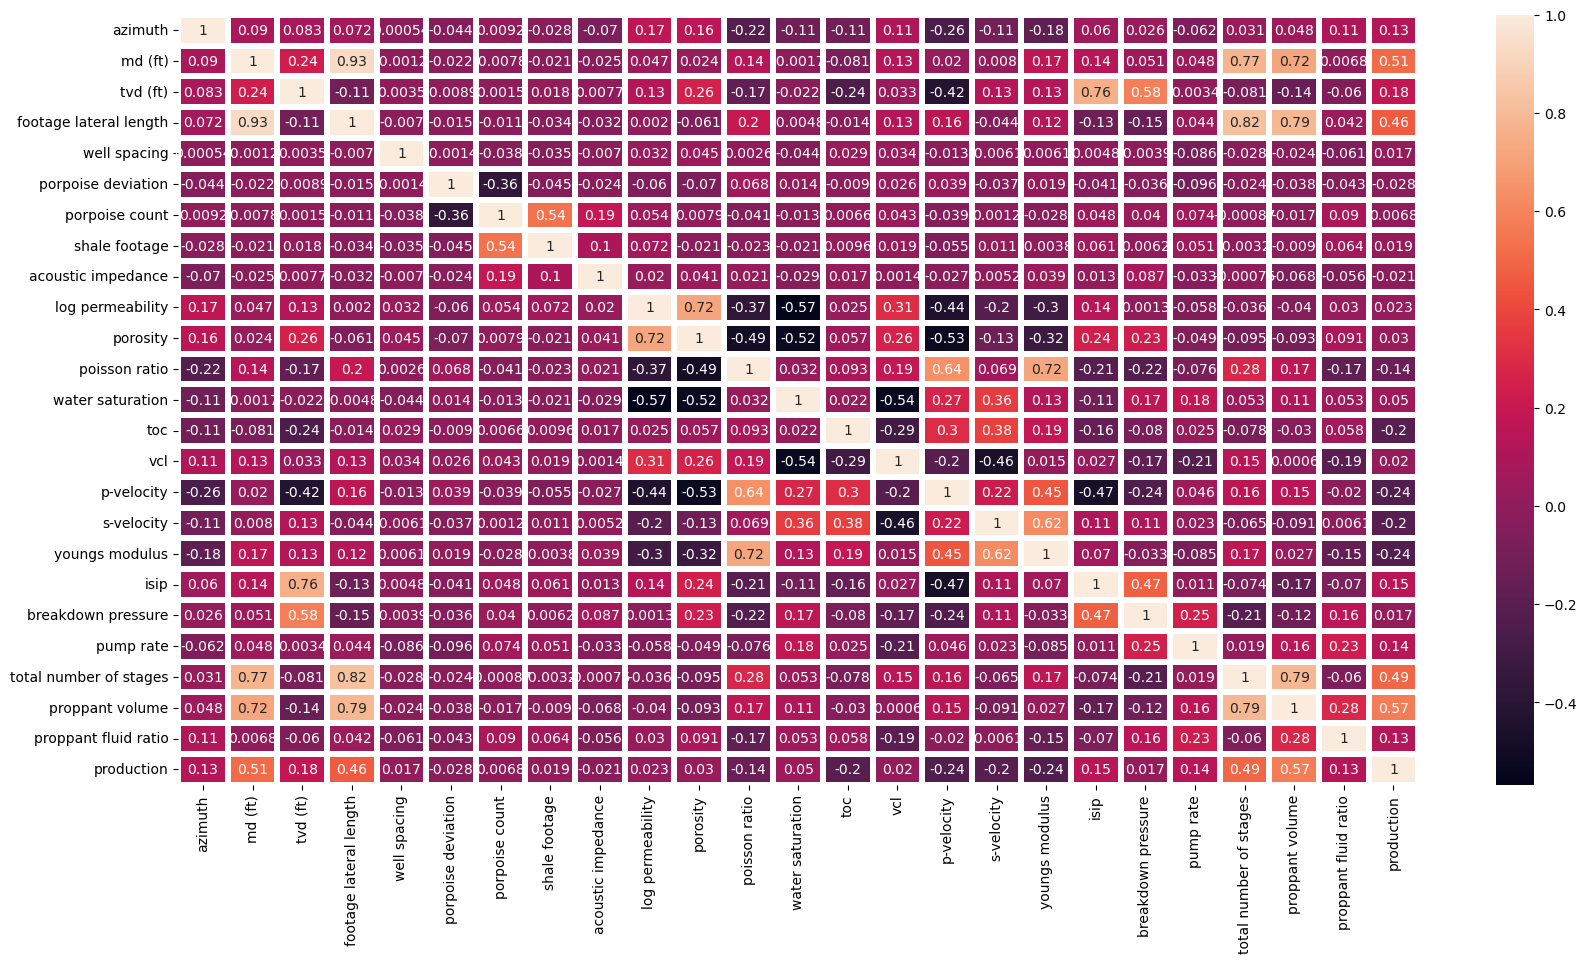

In [216]:
# check correlations in the data
num_col = df.select_dtypes(exclude=['object','datetime']).columns
corr = df[num_col].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True,linewidths=4)

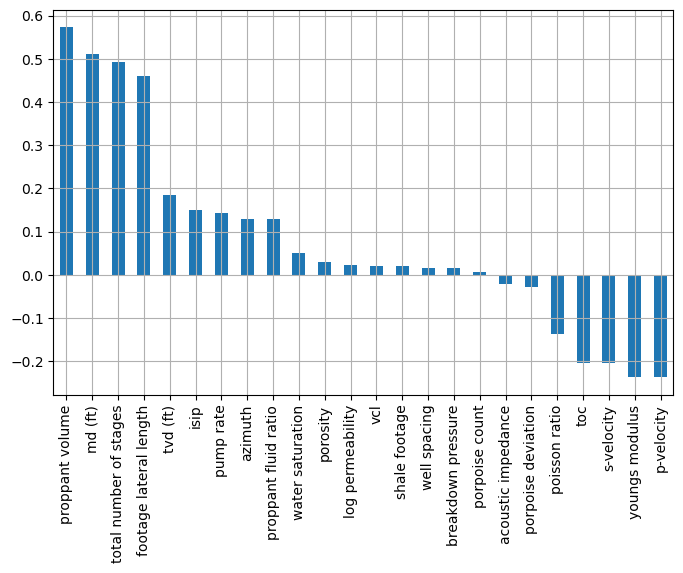

In [217]:
# check how all the features correlate with the target, production column
plt.figure(figsize=(8,5))
corr = df[num_col].corr()['production'].sort_values(ascending=False)[1:]
corr.plot(kind='bar', grid=True)
plt.show()

From the correlation heatmap; 
 - md(ft),
 - footage lateral length
 - total number of stages
 - proppant volume 
 - tvd(ft)
correlate highly positive with the targe column, production.
 
* Negative correlated columns:
  - p-velocity
  - s- velocity
  - young modulus
  - toc
  - poisson ratio
  - poisson count
  - acoustic impedence
  

### Feature Engineering

#### Treat missing values

In [218]:
# Treat the missing values by dropping columns with very high nan and replace the rest with the mode
df1 = df.copy()

df1.drop(['breakdown pressure','water saturation'],axis=1,inplace=True)

In [219]:
df1.isna().sum()

treatment company           0
azimuth                    55
md (ft)                     0
tvd (ft)                   20
date on production          0
operator                    0
footage lateral length      0
well spacing              156
porpoise deviation          0
porpoise count              0
shale footage               0
acoustic impedance          0
log permeability            0
porosity                  119
poisson ratio               0
toc                        21
vcl                         0
p-velocity                  0
s-velocity                  0
youngs modulus             19
isip                       77
pump rate                   0
total number of stages      0
proppant volume           132
proppant fluid ratio        0
production                  0
dtype: int64

In [220]:
# replace mean values for columns that are normally distributed
df1['azimuth'] = df1['azimuth'].replace(np.nan,df1['azimuth'].mean())
df1['tvd (ft)'] = df1['tvd (ft)'].replace(np.nan,df1['tvd (ft)'].mean())


# replace median values for skewed columns
df1['proppant volume'] = df1['proppant volume'].replace(np.nan,df1['proppant volume'].median())
df1['toc'] = df1['toc'].replace(np.nan,df1['toc'].median())
df1['porosity'] = df1['porosity'].replace(np.nan,df1['porosity'].median())
df1['youngs modulus'] = df1['youngs modulus'].replace(np.nan,df1['youngs modulus'].median())
df1['isip'] = df1['isip'].replace(np.nan,df1['isip'].median())
df1['well spacing'] = df1['well spacing'].replace(np.nan,df1['well spacing'].median())

* Distribution of the columns with missing values
  - Azimuth -- normally distributed
  - toc     -- left skewed
  - proppant volume --skewed to right
  - tvd(ft) -- normal
  - porosity -- right skewed
  - isip    -- right skewed
  - young modulus - left skewed

In [221]:
df1.isna().sum()

treatment company         0
azimuth                   0
md (ft)                   0
tvd (ft)                  0
date on production        0
operator                  0
footage lateral length    0
well spacing              0
porpoise deviation        0
porpoise count            0
shale footage             0
acoustic impedance        0
log permeability          0
porosity                  0
poisson ratio             0
toc                       0
vcl                       0
p-velocity                0
s-velocity                0
youngs modulus            0
isip                      0
pump rate                 0
total number of stages    0
proppant volume           0
proppant fluid ratio      0
production                0
dtype: int64

In [222]:
df1.shape

(1000, 26)

#### Convert categorical columns to numbers and split date 

In [223]:
# Convert categorical columns to numbers and split date 
df1['treatment company'] = df1['treatment company'].astype('category').cat.codes
df1['operator'] = df1['operator'].astype('category').cat.codes

df1['year'] = df1['date on production'].dt.year


In [224]:
df1.drop(['date on production'],axis=1,inplace=True)

#### Treate outliers

In [225]:
# write function to remove outliers

def remove_outliers(data):
    for col in data.columns:
        q1,q3 = data[col].quantile([0.25,0.75])
        
        iqr = q3-q1
        lower_q = q1 -1.5*iqr
        upper_q = q3+1.5*iqr
        
        data[col] = np.where(data[col]<lower_q,lower_q,data[col])
        data[col] = np.where(data[col]>upper_q,upper_q,data[col])
    return data

In [226]:
df1 = remove_outliers(df1)

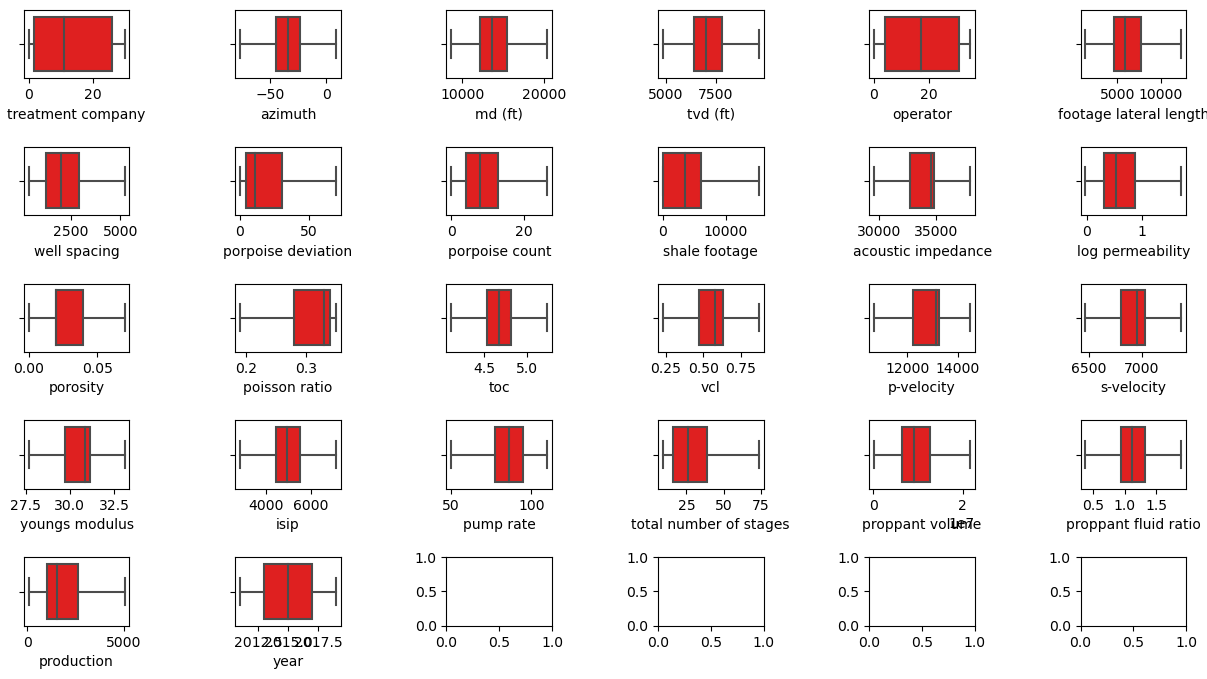

In [227]:
# Box of the columns in the dataset 
num_col = df1.select_dtypes(exclude=["object","datetime"]).columns
fig,ax =plt.subplots(5,6, figsize=(15,8))

for idx, num_col in enumerate(num_col):
    row, col = idx //6, idx %6 
    sns.boxplot(x=num_col, data=df1,color='red', ax=ax[row,col])
    plt.interactive(True)
    
plt.subplots_adjust(hspace=1,wspace=1)
plt.show()

The outliers have been treated

### Feature Selection

In [228]:
# Split the data into feature and target set and use randomforest for feature importance
X = df1.drop(['production'],axis=1)
Y = df1['production']



In [229]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression

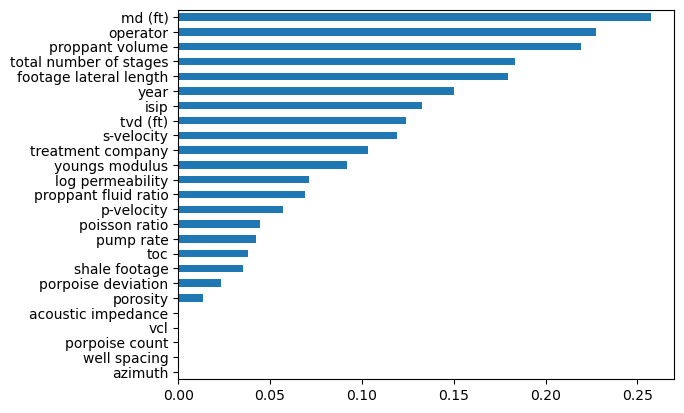

In [230]:
selector = SelectKBest(score_func=mutual_info_regression,k=10)
selector.fit(X,Y)

feature_importance = pd.Series(selector.scores_,index=X.columns).sort_values(ascending=True)
feature_importance.plot(kind='barh')
plt.show()

 * From scatter plots with production column, below features had little or no relation
  - well spacing
  - poisson ratio
  - p-velocity
  - toc
  - s-velocity
  
* From correlation plot with production column, below features correlated negatively and zero
   - p-velocity
  - s- velocity
  - young modulus
  - toc
  - poisson ratio
  - porpoise count
  - acoustic impedence
  
* From SelectKBest feature selection, below features has no scores
  - vcl
  - azimuth
  - well spacing
  - acoustic impedance
  - porpoise count
  


### Selected features for model training

In [231]:

# Split the data into feature and target set and use randomforest for feature importance
X = df1.drop(['production','well spacing','porpoise count','acoustic impedance',
              'vcl','toc','s-velocity','p-velocity','poisson ratio','porpoise deviation','azimuth'],axis=1)


Y = df1['production']



### Standardize the data

In [232]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler


In [233]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(np.array(Y).reshape(-1,1))

In [234]:
# Split data in to train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)

In [235]:
x_train.shape, x_test.shape

((800, 15), (200, 15))

In [236]:
y_train.shape, y_test.shape

((800, 1), (200, 1))

### Build the DL model

In [237]:
model = Sequential()
#model.add(Dense(64,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))


In [238]:
#model.summary()

In [239]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [240]:
# Train the model
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=3)
history = model.fit(x_train,y_train, epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
25/25 [==============================] - 7s 62ms/step - loss: 0.9705 - val_loss: 0.7561
Epoch 2/50
25/25 [==============================] - 0s 14ms/step - loss: 0.9097 - val_loss: 0.6645
Epoch 3/50
25/25 [==============================] - 0s 10ms/step - loss: 0.8122 - val_loss: 0.5909
Epoch 4/50
25/25 [==============================] - 0s 10ms/step - loss: 0.7264 - val_loss: 0.5426
Epoch 5/50
25/25 [==============================] - 1s 23ms/step - loss: 0.7014 - val_loss: 0.4995
Epoch 6/50
25/25 [==============================] - 0s 17ms/step - loss: 0.6503 - val_loss: 0.4586
Epoch 7/50
25/25 [==============================] - 0s 20ms/step - loss: 0.6230 - val_loss: 0.4384
Epoch 8/50
25/25 [==============================] - 1s 38ms/step - loss: 0.6185 - val_loss: 0.4196
Epoch 9/50
25/25 [==============================] - 0s 15ms/step - loss: 0.5699 - val_loss: 0.4174
Epoch 10/50
25/25 [==============================] - 0s 9ms/step - loss: 0.5821 - val_loss: 0.3974
Epoch 11/5

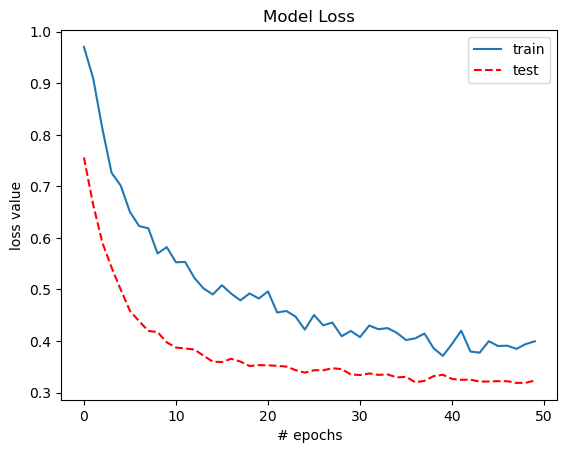

In [241]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'--r')
plt.title('Model Loss')
plt.ylabel('loss value')
plt.xlabel('# epochs')
plt.legend(['train','test'], loc='best')
plt.show()

In [242]:
from sklearn.metrics import r2_score

7/7 [==============================] - 0s 3ms/step


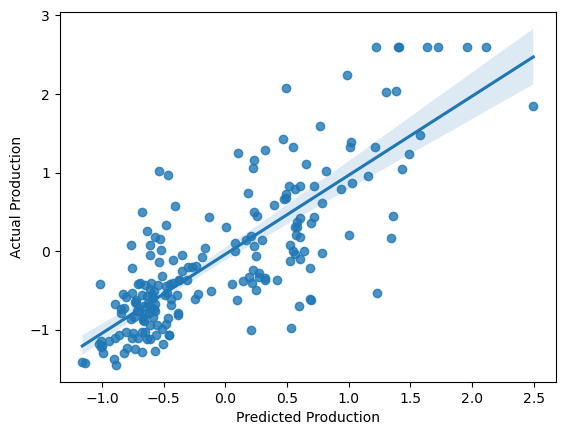

In [243]:
y_pred = model.predict(x_test)

sns.regplot(x=y_pred,y=y_test)
plt.xlabel("Predicted Production")
plt.ylabel("Actual Production")
plt.show()

In [244]:
r2_score(y_test,y_pred) 

0.6354874908578849

## Classical  ML Algorithms

In [264]:
# model evaluation function

def evaluate_model(model,X_train,y_train,X_test,y_test):
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mae = print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
    mse = print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
    rmse= print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
    r2score =r2_score(y_test,y_pred)
    print("R2 Score: ",r2score)
    y_test = scaler.inverse_transform(y_test.reshape(-1,1))
    y_pred = scaler.inverse_transform(y_pred.reshape(-1,1))
    
    # plot the actual vs predicted price
    
    sns.regplot(x=y_pred,y=y_test)
    plt.xlabel("Predicted Production")
    plt.ylabel("Actual Production")
    plt.show()
    
    return 
    

### Linear Regression

Mean Absolute Error: 0.47831147464666723
Mean Squared Error:  0.3900905251688747
Root Mean Squared Error:  0.6245722737753211
R2 Score:  0.560262815071674


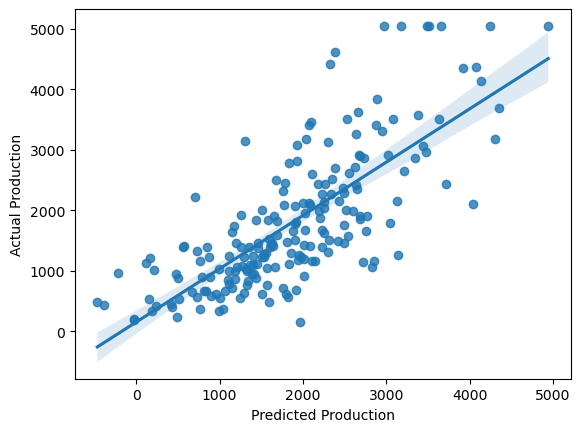

In [265]:
lr = LinearRegression()
evaluate_model(lr,x_train,y_train,x_test,y_test)

### Random Forest Regressor


Mean Absolute Error: 0.3547094988529521
Mean Squared Error:  0.2378005385904941
Root Mean Squared Error:  0.4876479658426703
R2 Score:  0.7319346852401653


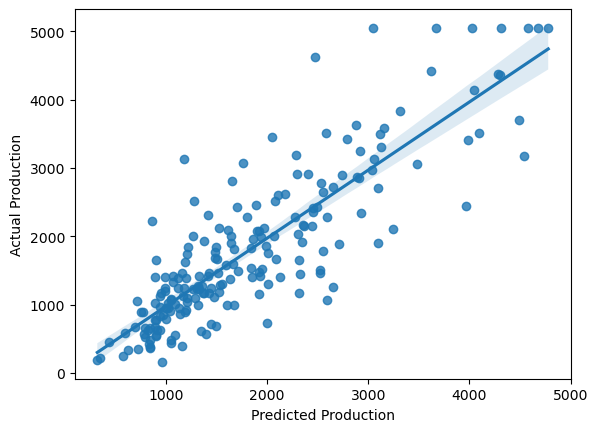

In [266]:
rf = RandomForestRegressor()
evaluate_model(rf,x_train,y_train,x_test,y_test)

In [267]:
from sklearn.ensemble import HistGradientBoostingRegressor,ExtraTreesRegressor

Mean Absolute Error: 0.3411036830451198
Mean Squared Error:  0.23690550587531192
Root Mean Squared Error:  0.48672939697054657
R2 Score:  0.7329436283987374


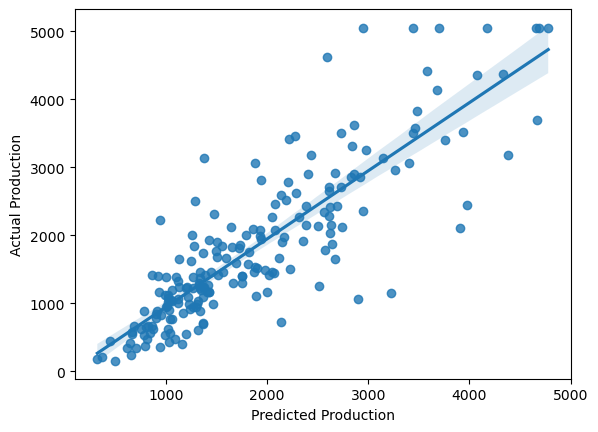

In [268]:
etr = ExtraTreesRegressor(n_estimators=500)
evaluate_model(etr,x_train,y_train,x_test,y_test)

Mean Absolute Error: 0.3388662417400172
Mean Squared Error:  0.22353093656098152
Root Mean Squared Error:  0.47279058425584314
R2 Score:  0.7480203736167002


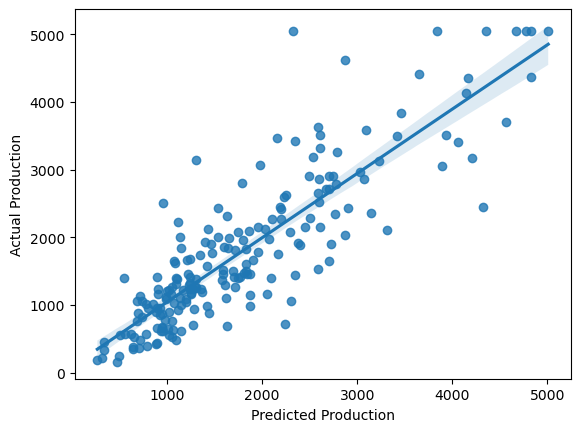

In [269]:
hbr = HistGradientBoostingRegressor()
evaluate_model(hbr,x_train,y_train,x_test,y_test)

### Ridge

Mean Absolute Error: 0.47826982871645596
Mean Squared Error:  0.3899030527697599
Root Mean Squared Error:  0.6244221751105256
R2 Score:  0.5604741470054676


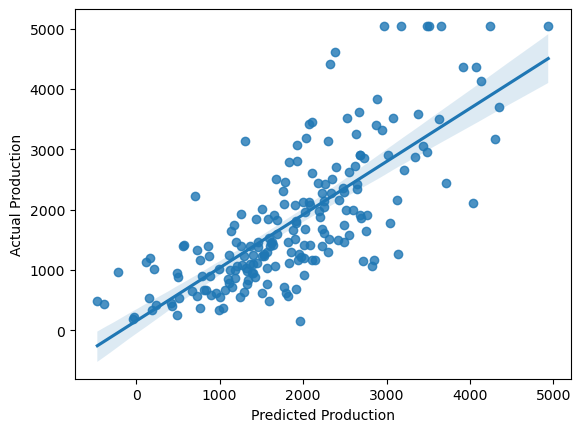

In [270]:
ridge = Ridge()
evaluate_model(ridge,x_train,y_train,x_test,y_test)

### SVR

Mean Absolute Error: 0.36252866283192103
Mean Squared Error:  0.2610862265758901
Root Mean Squared Error:  0.5109659739903334
R2 Score:  0.705685437378058


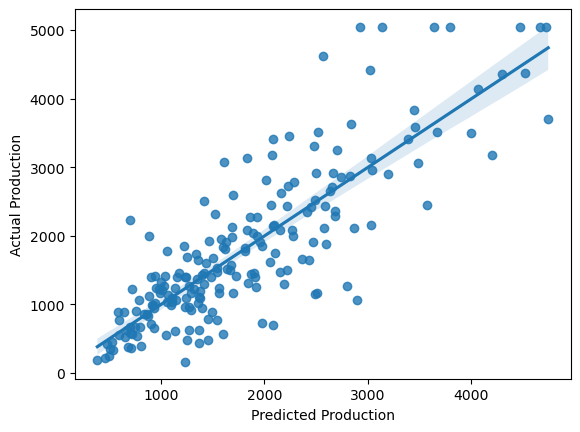

In [271]:
svr = SVR(kernel='rbf')
evaluate_model(svr,x_train,y_train,x_test,y_test)

### GradientBoostingRegressor()

Mean Absolute Error: 0.384914345077405
Mean Squared Error:  0.26831750518357067
Root Mean Squared Error:  0.5179937308342357
R2 Score:  0.6975338369335271


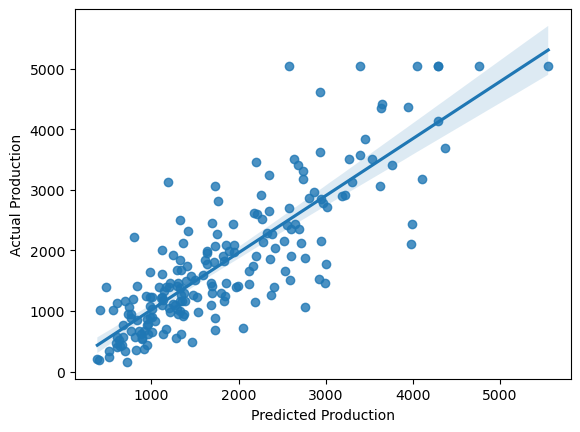

In [272]:
gbr = GradientBoostingRegressor(loss='squared_error',criterion='squared_error')
evaluate_model(gbr,x_train,y_train,x_test,y_test)

Mean Absolute Error: 0.4689271331958703
Mean Squared Error:  0.4525042745694465
Root Mean Squared Error:  0.6726843796086293
R2 Score:  0.4899056936051941


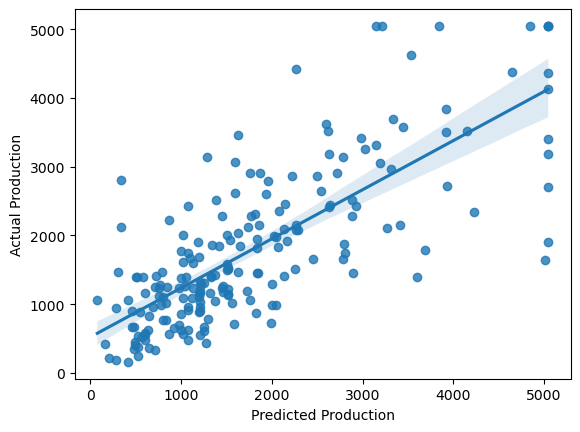

In [273]:
dtree= DecisionTreeRegressor()
evaluate_model(dtree,x_train,y_train,x_test,y_test)

### KNN

Mean Absolute Error: 0.43585234214931334
Mean Squared Error:  0.3528446694716807
Root Mean Squared Error:  0.5940072974902587
R2 Score:  0.6022489354149978


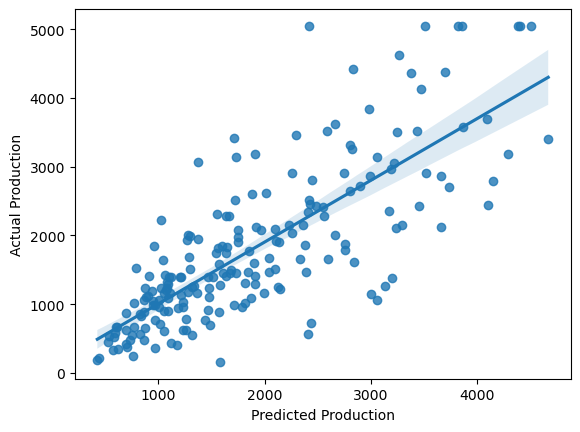

In [274]:
knn = KNeighborsRegressor()
evaluate_model(knn,x_train,y_train,x_test,y_test)

In [275]:
from xgboost import XGBRegressor

Mean Absolute Error: 0.3702994182338083
Mean Squared Error:  0.27542268334541087
Root Mean Squared Error:  0.5248072821002114
R2 Score:  0.6895243856864115


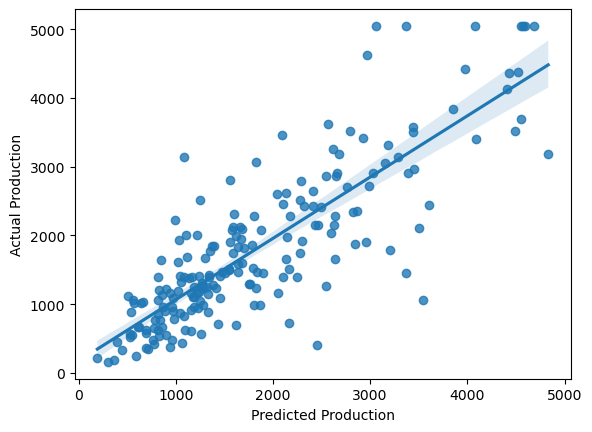

In [276]:
xgr = XGBRegressor()
evaluate_model(xgr,x_train,y_train,x_test,y_test)